In [1]:
import os
from os.path import join as oj
import pandas as pd
import numpy as np
from scipy.stats import sem
from collections import defaultdict

from utils.utils import cwd, set_up_plotting

plt = set_up_plotting()

In [2]:
TRAIL_TYPES = ['rand_IG_sum_trail', 'entropy_IG_sum_trail', 'joint_IG_sum_trail', 
              'greedy_IG_sum_trail_1', 'greedy_IG_sum_trail_2', 'greedy_IG_sum_trail_3', 'greedy_IG_sum_trail_4',
#               'greedy_IGsum_sum_trail', 
                   'dynamic_beta_sum_trail']

In [24]:

def get_mean_sem_results(result_datas):

    overall_result = defaultdict(list)

    for result_data in result_datas:
    #     print(list(result_data.keys()))
        IG_trail = result_data['IG_trail']
        IG_trail_dict = result_data['IG_trail'].item()
        for trail_type, trail in IG_trail_dict.items():
            overall_result[trail_type].append(trail)
    mean_results = {}
    sem_results = {}
    for key, value in overall_result.items():

        mean_results[key] = np.mean(np.asarray(value), axis=0)
        sem_results[key] = sem(np.asarray(value), axis=0)
    return mean_results, sem_results


def plot_sep_trails(mean_results, sem_results, setting):
    plt.figure(figsize=(12, 8))
    
    trail_types = TRAIL_TYPES

    for trail_type in trail_types:
        trail = mean_results[trail_type]
        x = np.arange(len(trail))
        plt.errorbar(x, trail, yerr = sem_results[trail_type], label=trail_type.replace('_sum_trail', '').replace('_IG', '').replace('_beta', '$~\\beta$'))
        plt.legend(loc='lower right', ncol=2)
    plt.tight_layout()
    plt.savefig(f'IG_sep_trails-{setting}.png', bbox_inches='tight')
#     plt.show()
    return

def tabulate_final_IGs(mean_results, sem_results, setting):
    final_IG_mean = {}
    final_IG_mean_sem = {}
    final_IG_std = {}
    final_IG_std_sem = {}


    trail_types = TRAIL_TYPES

    for trail_type in trail_types:
#         if not ('sep' in trail_type or 'ind' in trail_type): continue

        trail = mean_results[trail_type]
#     for trail_type, trail in mean_results.items():

        final_IG_mean[trail_type] = np.mean(trail[-1])
        final_IG_std[trail_type] = np.std(trail[-1] / np.mean(trail[-1]))

        final_IG_mean_sem[trail_type] = sem(trail[-1])
        final_IG_std_sem[trail_type] = sem(trail[-1] / np.mean(trail[-1]) ) 

    mean_values = []
    mean_sem_values = []
    std_values = []
    std_sem_values = []

    for trail_type in trail_types:
        mean_values.append(final_IG_mean[trail_type])
        std_values.append(final_IG_std[trail_type])

        mean_sem_values.append(final_IG_mean_sem[trail_type])
        std_sem_values.append(final_IG_std_sem[trail_type])

    methods = [trail.replace('_sep_trail', '').replace('_IG', '').replace('_greedy_trails', '') for trail in trail_types]
    data_for_df = {'Methods': methods,
                    'Final IG mean': mean_values, 'Final IG mean (sem)' : mean_sem_values, 
                   'Final IG std' : std_values, 'Final IG std (sem)' : std_sem_values}
    final_IG_df = pd.DataFrame(data= data_for_df)
    final_IG_df.to_csv(f'final_IG-{setting}.csv', index=False)
    final_IG_df.to_latex(f'final_IG-{setting}.tex', index=False)
    return
    

#### For synthetic_1D, material, drug

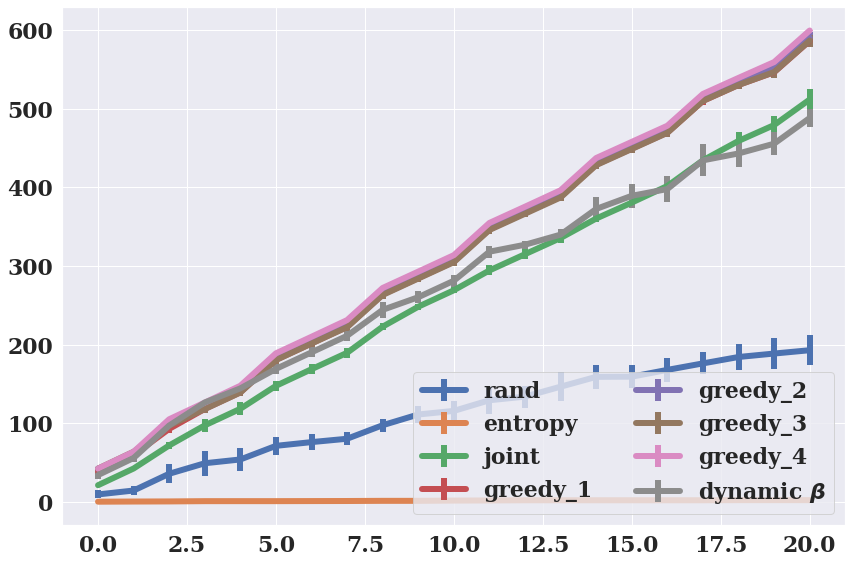

In [25]:
gauss_dir = oj('results', 'gauss', 'results')
settings = ['synthetic_1D', 'material', 'drug'] # DE-odp, DE-vdp, DE-sde

local_dir = 'results'
setting = 'drug'

# xlog0_dir = oj('results', 'xlog0', 'results')

# with cwd(oj(xlog0_dir, setting)):
with cwd(oj(local_dir, setting)):
# with cwd(oj(gauss_dir, setting)):
    result_datas = []
    for file in os.listdir():
        if file.endswith('.npz'):
            result_datas.append(np.load(file, allow_pickle=True))
    
    mean_results, sem_results = get_mean_sem_results(result_datas)
    
    plot_sep_trails(mean_results, sem_results, setting)
    
    tabulate_final_IGs(mean_results, sem_results, setting)

#### For synthetic_2D, DE

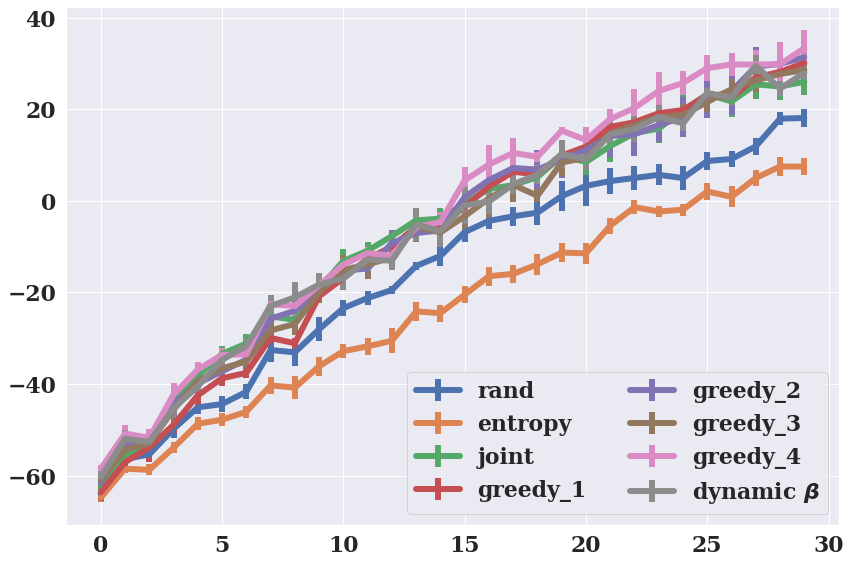

In [26]:
local_dir = oj('results')

setting = 'DE'

for de_type in ['ODE']:

    with cwd(oj(local_dir, setting)):
        result_datas = []
        for file in os.listdir():
            if file.endswith('.npz') and de_type.upper() in file:
                result_datas.append(np.load(file, allow_pickle=True))

        mean_results, sem_results = get_mean_sem_results(result_datas)    

        plot_sep_trails(mean_results, sem_results, de_type)

        tabulate_final_IGs(mean_results, sem_results, de_type)

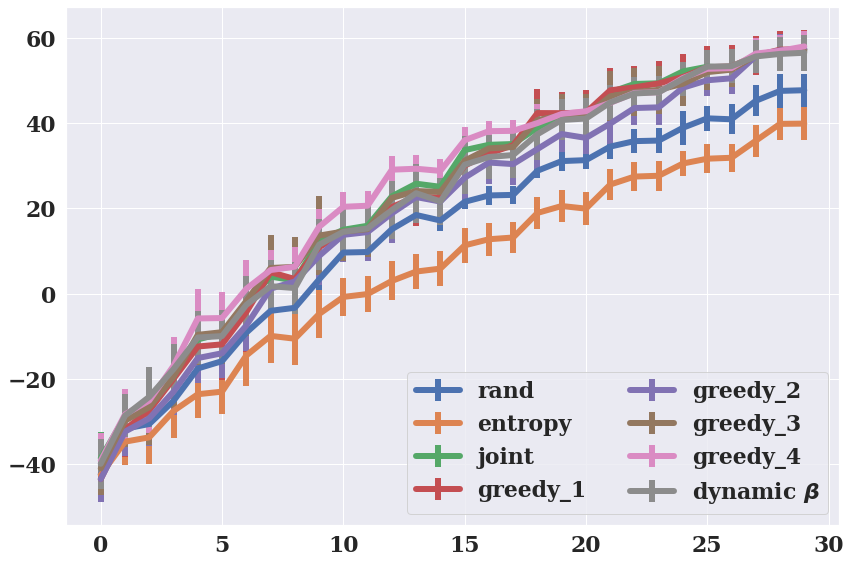

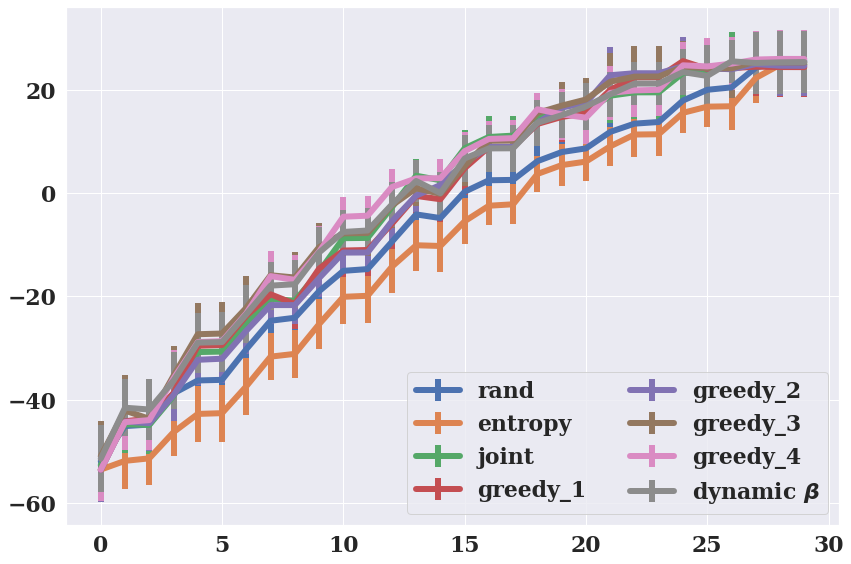

In [27]:
gauss_dir = oj('results', 'gauss', 'results')
settings = ['synthetic_2D', 'DE'] # DE-odp, DE-vdp, DE-sde

local_dir = 'results'
setting = 'DE'

for de_type in ['SDE', 'VDP']:

    with cwd(oj(local_dir, setting)):
        result_datas = []
        for file in os.listdir():
            if file.endswith('.npz') and de_type.upper() in file:
                result_datas.append(np.load(file, allow_pickle=True))

        mean_results, sem_results = get_mean_sem_results(result_datas)    

        plot_sep_trails(mean_results, sem_results, de_type)

        tabulate_final_IGs(mean_results, sem_results, de_type)

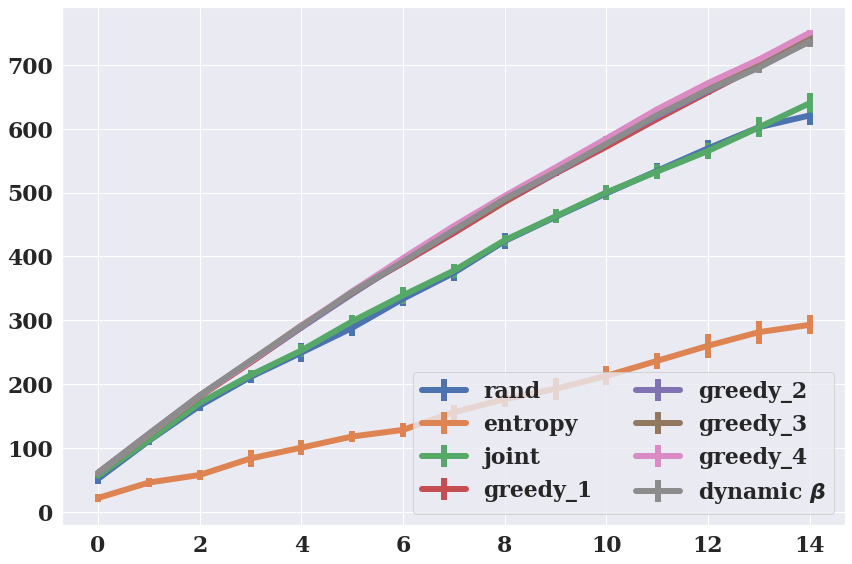

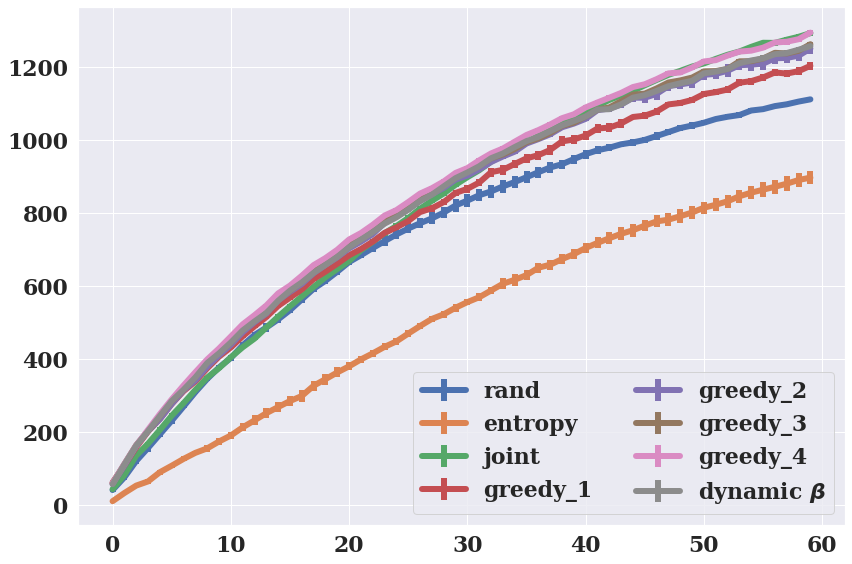

In [28]:

local_dir = 'results'
setting = 'synthetic_2D'

for setting_type in ['identical', 'mismatch']:

    with cwd(oj(local_dir, setting)):
        result_datas = []
        for file in os.listdir():
            if file.endswith('.npz') and setting_type in file:
                result_datas.append(np.load(file, allow_pickle=True))

        mean_results, sem_results = get_mean_sem_results(result_datas)    

        plot_sep_trails(mean_results, sem_results, setting_type)

        tabulate_final_IGs(mean_results, sem_results, setting_type)